<a href="https://colab.research.google.com/github/pachterlab/GCCP_2021/blob/main/test_colab_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install required packages

<AxesSubplot:>

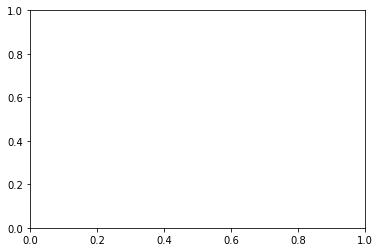

In [3]:
import matplotlib.pyplot as plt
plt.subplot()

In [2]:
%pip install scanpy
%pip install scvi-tools==0.8.1
%pip install loompy
%pip install leidenalg

     |████████████████████████████████| 2.0 MB 5.1 MB/s 
     |████████████████████████████████| 11.2 MB 210 kB/s 
     |████████████████████████████████| 88 kB 966 kB/s 
     |████████████████████████████████| 96 kB 4.6 MB/s 
     |████████████████████████████████| 930 kB 34.5 MB/s 
     |████████████████████████████████| 1.1 MB 5.6 MB/s 
     |████████████████████████████████| 63 kB 1.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7646d70e51a5df7b55398df88249da67840206b3bb902a23a35184c4519efe47
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=988df47615307092975e1f6b4124d4c6e78afc391cf38735b3e1bdac96a29633
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for session-info: filename=session_info-1.0.0-py3-none

     |████████████████████████████████| 149 kB 5.3 MB/s 
     |████████████████████████████████| 232 kB 44.6 MB/s 
     |████████████████████████████████| 51 kB 7.3 MB/s 
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 1.7.0 which is incompatible.
     |████████████████████████████████| 4.8 MB 5.4 MB/s 
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52040 sha256=36b4dc6ef52d21b0e7dd76cd23a5b5070b46bf86c1278234c089b38c3c13f96d
  Stored in directory: /root/.cache/pip/wheels/48/36/9f/eb3377d4a7423b96105b6667d36c3faa49ee73b96d8cab80b3
Su

In [4]:
import torch 
memory_used = torch.cuda.memory_allocated()
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())

True
1
0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# System
import os, pathlib, time, gc

# Math
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Plots
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

# scvi
import anndata
import scvi
import torch

In [7]:
%cd "/content/drive/Shareddrives/scBIVI/scBIVI colab/scBIVI"
!ls

/content/drive/Shareddrives/scBIVI/scBIVI colab/scBIVI
analysis.py	 download_data.sh     preprocess.py	run_scBIVI.py
bivae.py	 experiment_colab.py  __pycache__	run.sh
data		 gena_snippets	      README.txt	scBIVI.ipynb
distribution.py  out		      requirements.txt	scBIVI.py


In [8]:
# scbivi
from scBIVI import scBIVI
from analysis import calculate_accuracy, \
                     plot_corr_comparison, \
                     jaccard_index_split, \
                     knn_overlap


Manual scBIVI code

# Load data 

In [9]:
outdir = 'out/pbmc_10k_v3'
datadir = os.path.join(outdir,'data/preprocessed.h5ad')
logdir = os.path.join(outdir,'out')
percent_keep = 1
cluster_method_split = 'RNA_leiden'

## Load anndata
dataext = pathlib.Path(datadir).suffix
if dataext == '.h5ad':
    adata = anndata.read_h5ad(datadir)
elif dataext == '.loom':
    adata = anndata.read_loom(datadir)

## Downsample the data
if percent_keep < 1:
    X = adata.layers['counts']
    # Convert to numpy array if not already
    try:
        X = X.toarray()
    except:
        pass
    adata.layers['counts'] = np.random.binomial(X.astype('int32'),percent_keep)

# Set up train/test data splits with 5-fold split
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
skf_splits = skf.split(adata, adata.obsm['Cluster'][cluster_method_split])


# Run single instance for testing

Define hyper parameters and model (distribution) type

In [10]:
# Hyper-parameters
lr       = 1e-3
n_latent = 20 # overwritten by setup name
n_epochs = 10
# n_epochs = 20
n_hidden = 1024
n_layers = 2

# model setup
# scBIVI{dist}-{n_latent}-{data type}
# type: 
setup = 'scBIVIcustom-10-combined'
# setup = 'scBIVI-10-combined'


In [11]:
# Use last of the K-fold splits
for k, (train_index, test_index) in enumerate(skf_splits):
  pass

setups = [setup]

cluster_methods = adata.obsm['Cluster'].columns.to_list()
metrics_list = ['recon_error','latent embedding','compute'] + cluster_methods
results_dict = {setup:{metrics: [] for metrics in metrics_list} for setup in setups}

logdir_train = os.path.join(logdir,'train')
os.makedirs(logdir_train, exist_ok=True)

In [13]:
from torch._C import Value
from seaborn.axisgrid import PairGrid
# Define custom_dist if using scBIVIcustom


# Set to default bivariate as example
# from distribution import log_nb_positive_bi
# custom_dist = log_nb_positive_bi
def log_bursty_nb_bi(x: torch.Tensor, mu1: torch.Tensor, mu2: torch.Tensor,
                       theta: torch.Tensor, eps=1e-8, **kwargs):
    """
    Log likelihood (scalar) of a minibatch according to a bivariate nb model.
    Parameters
    ----------
    x
        data
    mu1,mu2
        mean of the negative binomial (has to be positive support) (shape: minibatch x vars/2)
    theta
        params (has to be positive support) (shape: minibatch x vars)
    eps
        numerical stability constant
    Notes
    -----
    We parametrize the bernoulli using the logits, hence the softplus functions appearing.
    """

    # Divide the original data x into spliced (x) and unspliced (y)
    n,m = torch.chunk(x,2,dim=-1)

    # THETA_IS_MAT_SHAPE = True #this breaks at 5%
    # THETA_IS_B = False
    # THETA_IS_NAS_SHAPE = False
    
    # THETA_IS_MAT_SHAPE = False #best performance: breaks at 25%
    # THETA_IS_B = True
    # THETA_IS_NAS_SHAPE = False
    
    THETA_IS_MAT_SHAPE = False #best performance: breaks at 65%
    THETA_IS_B = False
    THETA_IS_NAS_SHAPE = True
    if THETA_IS_MAT_SHAPE:
        gamma = 1/theta
        b = mu2*gamma
        beta = b/mu1
    elif THETA_IS_B:
        b = theta
        beta = b/mu1
        gamma = b/mu2
    elif THETA_IS_NAS_SHAPE:
        beta = 1/theta
        b = mu1*beta
        gamma = b/mu2


    if torch.any(~torch.isfinite(gamma)):
        filt = ~torch.isfinite(gamma)
        print(gamma[filt])
        print(b[filt])
        print(beta[filt])
        print(mu1[filt])
        print(mu2[filt])
        print("bad gamma")
        raise ValueError
    if torch.any(~torch.isfinite(beta)):
        print("bad beta")
        raise ValueError
    if torch.any(~torch.isfinite(b)):
        print("bad b")
        raise ValueError

    var1 = mu1 * (1+b)
    var2 = mu2 * (1+b*beta/(beta+gamma))
    cov = b**2/(beta+gamma)
    
    logvar1 = torch.log((var1/mu1**2)+1)
    logvar2 = torch.log((var2/mu2**2)+1)
    logstd1 = torch.sqrt(logvar1)
    logstd2 = torch.sqrt(logvar2)

    logmean1 = torch.log(mu1**2/torch.sqrt(var1+mu1**2))
    logmean2 = torch.log(mu2**2/torch.sqrt(var2+mu2**2))

    if torch.any(~torch.isfinite(logmean1)):
        print("bad logmean1")
        raise ValueError
    if torch.any(~torch.isfinite(logmean2)):
        print("bad logmean2")
        raise ValueError
    if torch.any(~torch.isfinite(logstd1)):
        print("bad logstd1")
        raise ValueError
    if torch.any(~torch.isfinite(logstd2)):
        print("bad logstd2")
        raise ValueError
    if torch.any(~torch.isfinite(cov)):
        print("bad cov")
        raise ValueError

    logcov = torch.log(cov * torch.exp(-(logmean1 + logmean2 + (logvar1 + logvar2)/2)) +1 )
    logcorr = logcov/torch.sqrt(logvar1 * logvar2)
    if torch.any(torch.logical_or((logcorr<0), (logcorr>1))):
        print('excuse me haha what')
        filt = torch.logical_or((logcorr<0), (logcorr>1))
        print('params')
        # print(b[filt])/
        print(gamma[filt][10])
        print(beta[filt][10])
        # print()
        # print('logcov')
        # print(logcov[filt])
        # print('logcorr')
        # print(logcorr[filt])
        raise ValueError('Parameters are wrong!')

    if torch.any(~torch.isfinite(logcov)):
        raise ValueError("bad logcov")
    if torch.any(~torch.isfinite(logcorr)):
        raise ValueError("bad logcorr")

    logmean_cond = logmean2 + logcorr * logstd2/logstd1 * (torch.log(n+1) - logmean1)
    logvar_cond = logvar2 * (1-logcorr**2)  
    # logstd_cond = logstd2 * torch.sqrt(1-logcorr**2)   
    # logvar_cond = logstd_cond**2

    if torch.any(~torch.isfinite(logmean_cond)):
        raise ValueError("bad logmean_cond")
    if torch.any(~torch.isfinite(logcorr**2)):
        raise ValueError('bad square')
    if torch.any(~torch.isfinite((1-logcorr**2)**0.5)):
        print('bad sqrt')
        filt = ~torch.isfinite((1-logcorr**2)**0.5)
        # print('logstd cond')
        # print(logstd_cond[filt])
        print('logstd2')
        print(logstd2[filt])
        print('logcorr')
        print(logcorr[filt])
        print('sqrt')
        print(torch.sqrt(1-logcorr**2)   [filt])
        print('radical argument')
        print((1-logcorr**2)[filt])
        raise ValueError('Something weird in sqrt')
    if torch.any(~torch.isfinite(torch.sqrt(1-logcorr**2))):
        raise ValueError('bad torch.sqrt')
    # if torch.any(~torch.isfinite(logstd_cond)):
    #     print(logstd2)
    #     print(torch.sqrt(1-logcorr**2) )
    #     raise ValueError("bad logstd_cond")
    if torch.any(~torch.isfinite(logvar_cond)):
        raise ValueError("bad logvar_cond")


    mean_cond = torch.exp(logmean_cond + logvar_cond/2)
    var_cond = torch.exp(2*logmean_cond + logvar_cond) * (torch.exp(logvar_cond) - 1)
    if torch.any(~torch.isfinite(mean_cond)):
        raise ValueError("bad mean_cond")
    if torch.any(~torch.isfinite(var_cond)):
        raise ValueError("bad var_cond")

    r = 1/beta
    r_cond = mean_cond**2/(var_cond-mean_cond)
    p_cond = mean_cond/var_cond
    prefactor = torch.lgamma(n+r) - torch.lgamma(n+1) - torch.lgamma(r) \
                + r * torch.log(r/(r+mu1)+eps) + n * torch.log(mu1/(r+mu1)+eps)

    if torch.any(~torch.isfinite(r)):
        raise ValueError("bad r")
    if torch.any(~torch.isfinite(prefactor)):
        raise ValueError("bad prefactor")


    filt = torch.logical_and(torch.logical_and(r>0,p_cond>0), p_cond<1)

    #compute the Poisson mean
    y_ = m * torch.log(mean_cond+eps) - mean_cond - torch.lgamma(m+1) 
    y_[filt] += torch.lgamma(m[filt]+r_cond[filt]) - torch.lgamma(r_cond[filt]) \
                + r_cond[filt] * torch.log(r_cond[filt]/(r_cond[filt]+mean_cond[filt])+eps) \
                - m[filt] * torch.log(r_cond[filt]+mean_cond[filt]+eps) + mean_cond[filt]

    # y_ = torch.lgamma(m+r_cond) - torch.lgamma(m+1) - torch.lgamma(r_cond) \
                # + r_cond * torch.log(r_cond/(r_cond+mean_cond)) \
                # + m * torch.log(mean_cond/(r_cond+mean_cond))
    # y_ = torch.lgamma(m[filt]+r_cond[filt]) - torch.lgamma(m[filt]+1) - torch.lgamma(r_cond[filt]) \
    #             + r_cond[filt] * torch.log(r_cond[filt]/(r_cond[filt]+mean_cond[filt])) \
    #             + m[filt] * torch.log(mean_cond[filt]/(r_cond[filt]+mean_cond[filt]))
    # y_[~filt] = m[~filt] * torch.log(mean_cond[~filt]) - mean_cond[~filt] - torch.lgamma(m[~filt]+1) 
    # print(y_.device)
    # print(y_.shape)
    # print(n.shape)
    # print(filt.shape)
    # print(y_.shape)
    # print(prefactor.shape)
    P = prefactor +  y_
    if torch.any(~torch.isfinite(y_)):
        raise ValueError('bad y_')
    return P


custom_dist = log_bursty_nb_bi


In [14]:
memory_used = torch.cuda.memory_allocated()
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())

True
1
0


In [15]:
# print(setup)
method,n_latent,datas = setup.split("-")
method_split = method.split('_')
method = method_split[0]

# If set up includes additional argument
additional_kwargs = {s.split('=')[0]: float(s.split('=')[1]) for s in method_split[1:]}

n_latent = int(n_latent)

## Split the data
if datas == 'spliced':
  adata_in = adata[:,:int(adata.shape[1]/2)]
elif datas == 'unspliced':
  adata_in = adata[:,int(adata.shape[1]/2):]
elif datas == 'combined':
  adata_in = adata
else:
  raise ValueError("Input valid datas")

adata_in = adata_in.copy()
scvi.data.setup_anndata(adata_in, layer="counts")

train_adata, test_adata = adata_in[train_index], adata_in[test_index]
train_adata = train_adata.copy()

## Set model parameters
model_args = {'use_cuda'     : True,
              'n_latent'     : n_latent,
              'n_layers'     : n_layers,
              'dispersion'   : 'gene',
              'n_hidden'     : n_hidden,
              'dropout_rate' :  0.1, #shouldn't use this at all
              'gene_likelihood'    :  'nb',
              'log_variational'    :  True,
              'latent_distribution':  'normal'
              }
model_args.update(additional_kwargs)

## Create model
if method == 'LDVAE':
    model = scvi.model.LinearSCVI(train_adata,**model_args)
elif method == 'scVI':
    model = scvi.model.SCVI(train_adata,**model_args)
elif method == "scBIVI":
    model = scBIVI(train_adata,mode='corr',**model_args)
elif method == "scBIVIuncorr":
    model = scBIVI(train_adata,mode='uncorr',**model_args)
elif method == 'scBIVImixed':
    model = scBIVI(train_adata,mode='mixed',**model_args)
elif method == 'scBIVItemp':
    model = scBIVI(train_adata,mode='mixed',**model_args)
elif method == 'scBIVIcustom':
    print(method)
    model = scBIVI(train_adata,mode='custom',
                   custom_dist=custom_dist,**model_args)
else:
    raise Exception('Input valid scVI model')

## Train model
start = time.time()
model.train(n_epochs = n_epochs,
            lr       = lr,
            # n_epochs_kl_warmup = n_epochs/2,
            metrics_to_monitor = ['reconstruction_error'],
            frequency = 1,
            train_size = 0.9)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 11581 cells, 5428 vars, 1 batches,
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          
scBIVIcustom
INFO     Training for 10 epochs                                                              


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: UserWarning: Specified kernel cache directory could not be created! This disables kernel caching. Specified directory is /root/.cache/torch/kernels. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/cuda/jit_utils.cpp:860.)


INFO     KL warmup phase exceeds overall training phaseIf your applications rely on the      
         posterior quality, consider training for more epochs or reducing the kl warmup.     
INFO     KL warmup for 400 epochs                                                            
Training...:  70%|███████   | 7/10 [01:05<00:28,  9.34s/it]


ValueError: ignored

In [ ]:
runtime     = time.time() - start
memory_used = torch.cuda.memory_allocated()
results_dict[setup]['compute'].append([runtime,memory_used])

## Check train history
df_history = {'reconstruction_error_test_set' : model.history['reconstruction_error_test_set'],
              'reconstruction_error_train_set': model.history['reconstruction_error_train_set']}
df_history = pd.DataFrame(df_history)
df_history = pd.DataFrame(df_history.stack())
df = df_history
df.reset_index(inplace=True)
df.columns = ['Epoch','Loss Type', 'Loss']
figname = f"{setup}-{k}"
sns.lineplot(data=df, 
             x='Epoch', 
             y='Loss', 
             hue = 'Loss Type')
# plt.savefig(os.path.join(logdir_train,f"{figname}-train-history.pdf"))
# plt.close()

In [ ]:
## Get reconstruction loss on test data
test_error  = model.get_reconstruction_error(test_adata)
train_error = model.get_reconstruction_error(train_adata)
results_dict[setup]['recon_error'].append(np.array([train_error,test_error]))

## Extract the embedding space for scVI
X_out = model.get_latent_representation(test_adata)

adata_latent = anndata.AnnData(X_out)
adata_latent.obs = test_adata.obs
results_dict[setup]['latent embedding'] = adata_latent
if datas == 'combined':
  test_adata_save = test_adata

In [ ]:
#### Validation with cluster accuracy based on labels
## Iterate through ground truth labels based on different approach

for cluster_method, y in test_adata.obsm['Cluster'].iteritems():

    y = np.array(y.tolist())

    score_dict = calculate_accuracy(X_out,y)
    results_dict[setup][cluster_method].append(score_dict)

#### Get predicted distribution
if 'scBIVI' in method:

    params = model.get_likelihood_parameters(test_adata)
    mu = params['mean']
    if method == 'scBIVImixed':
        import torch.nn.functional as F
        mu,mw = np.split(mu,2,axis=1)
        mw_tensor = torch.tensor(mw.reshape(-1,int(mw.shape[1]/2),2))
        mw_softmax = F.softmax(mw_tensor/10e-20,dim=-1)

    mu1,mu2 = np.split(mu,2,axis=1)
    alpha = params['dispersions']

    if mu1.shape[1] == alpha.shape[1]:
        stats = {'mu1': mu1, 'mu2' : mu2,
                  '1/alpha'         : 1/alpha,
                  'mu2/(mu1*alpha)' : mu2/(mu1*alpha),
                  'mu2/alpha'       : mu2/alpha
                  }

        fig,axs = plt.subplots(1,len(stats),
                                figsize=(5*len(stats),4),
                                squeeze=False)

        for ax, (stat,x) in zip(axs.reshape(-1),stats.items()):
            ax = sns.histplot(np.log(x.reshape(-1)),kde=False,ax=ax,bins=20)
            ax.set_title(stat)

        # plt.savefig(os.path.join(logdir_train,f"{figname}-hist.pdf"))
        # plt.close()

#### Correlations

# cg = plot_corr_comparison(X1,X2)
# figname = f"{setup}-{k}"
# plt.title(figname)
# plt.savefig(os.path.join(logdir,f"{figname}-corr.pdf"))
# plt.close()

del model
torch.cuda.empty_cache()
gc.collect()


In [ ]:
#### Plot NLL
setups = list(results_dict.keys())
df_plot = pd.concat([pd.DataFrame({"Train": -np.array(r['recon_error'])[:,0],
                                   "Test": -np.array(r['recon_error'])[:,1],
                                   'Setup': key}) for key,r in results_dict.items()])

df_plot['KFold'] = df_plot.index
df_plot.reset_index(drop=True)

df_plot.to_csv(os.path.join(logdir,'.svg'))

fig,ax=plt.subplots()
_ = sns.barplot(data=df_plot, x='Setup', y='Test', hue='Setup', dodge=False, ax=ax)
ax.get_legend().remove()
plt.xticks(rotation=45)
# plt.savefig(os.path.join(logdir,'nll.svg'))
# plt.close()

print(df_plot.groupby("Setup").mean())


In [ ]:
#### Plot clustering accuracy

# iterate through different cluster methods
for cluster_method in cluster_methods:
    df_plot = pd.concat([pd.DataFrame(r[cluster_method]).assign(Setup=key) for key,r in results_dict.items()])
    df_plot.to_csv(os.path.join(logdir,f'clust_acc_{cluster_method}.csv'))
    df_plot = df_plot.melt(id_vars=['Setup'],var_name='Metric',value_name='Score')

    fig,ax=plt.subplots()
    _ = sns.barplot(data=df_plot, x='Metric', y='Score', hue='Setup', ax=ax)
    plt.xticks(rotation=45)
    # plt.savefig(os.path.join(logdir,f'clust_acc_{cluster_method}.svg'))
    # plt.close()
    print(df_plot)

# Loop through all K-folds split and setups

In [ ]:
# print("{}/{}".format(torch.cuda.memory_allocated(),torch.cuda.max_memory_allocated()))

# # Hyper-parameters
# lr       = 1e-3
# n_latent = 2
# n_epochs = 20
# n_hidden = 1024
# n_layers = 3


# # setups = ['scBIVI-10-combined',
# #           'scVI-10-combined',
# #           "scVI-10-spliced",
# #           'scVI-10-unspliced',
# #           'scBIVIuncorr-10-combined',
# #           'scBIVImixed-10-combined']
# # setups = ['scBIVItemp_T=0.000001_Trate=0-10-combined']
# setups = ['scBIVIcustom-10-combined']

# # setups = ['scBIVI-10-combined',
# #           'scBIVItemp_T=1_Trate=0.01-10-combined',
# #           'scBIVItemp_T=1_Trate=0.0001-10-combined',
# #           'scBIVItemp_T=1_Trate=0.000001-10-combined',
# #           'scBIVItemp_T=1_Trate=0.00000001-10-combined',
# #           'scBIVItemp_T=1_Trate=0-10-combined',
# #           'scBIVItemp_T=0.01_Trate=0-10-combined',
# #           'scBIVItemp_T=0.0001_Trate=0-10-combined',
# #           'scBIVItemp_T=0.000001_Trate=0-10-combined',]

# cluster_methods = adata.obsm['Cluster'].columns.to_list()
# metrics_list = ['recon_error','latent embedding','compute'] + cluster_methods
# results_dict = {setup:{metrics: [] for metrics in metrics_list} for setup in setups}

# logdir_train = os.path.join(logdir,'train')
# os.makedirs(logdir_train, exist_ok=True)

In [ ]:
# for k, (train_index, test_index) in enumerate(skf_splits):
#     #
#   for setup in setups:
#       #
#     print(setup)
#     method,n_latent,datas = setup.split("-")
#     method_split = method.split('_')
#     method = method_split[0]
#     additional_kwargs = {s.split('=')[0]:float(s.split('=')[1]) for s in method_split[1:]}

#     n_latent = int(n_latent)

#     ## Split the data
#     if datas == 'spliced':
#       adata_in = adata[:,:int(adata.shape[1]/2)]
#     elif datas == 'unspliced':
#       adata_in = adata[:,int(adata.shape[1]/2):]
#     elif datas == 'combined':
#       adata_in = adata
#     else:
#       raise ValueError("Input valid datas")

#     adata_in = adata_in.copy()
#     scvi.data.setup_anndata(adata_in, layer="counts")

#     train_adata, test_adata = adata_in[train_index], adata_in[test_index]
#     train_adata = train_adata.copy()

#     ## Set model parameters
#     model_args = {'use_cuda'     : True,
#                   'n_latent'     : n_latent,
#                   'n_layers'     : n_layers,
#                   'dispersion'   : 'gene',
#                   'n_hidden'     : n_hidden,
#                   'dropout_rate' :  0.1,
#                   'gene_likelihood'    :  'nb',
#                   'log_variational'    :  True,
#                   'latent_distribution':  'normal'
#                   }
#     model_args.update(additional_kwargs)

#     ## Create model
#     if method == 'LDVAE':
#         model = scvi.model.LinearSCVI(train_adata,**model_args)
#     elif method == 'scVI':
#         model = scvi.model.SCVI(train_adata,**model_args)
#     elif method == "scBIVI":
#         model = scBIVI(train_adata,mode='corr',**model_args)
#     elif method == "scBIVIuncorr":
#         model = scBIVI(train_adata,mode='uncorr',**model_args)
#     elif method == 'scBIVImixed':
#         model = scBIVI(train_adata,mode='mixed',**model_args)
#     elif method == 'scBIVItemp':
#         # model_args['T'] = 1
#         # model_args['Trate'] = 1
#         model = scBIVI(train_adata,mode='mixed',**model_args)
#     elif method == 'scBIVIcustom':
#         model = scBIVI(train_adata,mode='custom',**model_args)
#     else:
#         raise Exception('Input valid scVI model')

#     ## Train model
#     start = time.time()
#     model.train(n_epochs = n_epochs,
#                 lr       = lr,
#                 n_epochs_kl_warmup = n_epochs/2,
#                 metrics_to_monitor = ['reconstruction_error'],
#                 frequency = 1,
#                 train_size = 0.9)

#     runtime     = time.time() - start
#     memory_used = torch.cuda.memory_allocated()
#     results_dict[setup]['compute'].append([runtime,memory_used])

#     ## Check train history
#     df_history = {'reconstruction_error_test_set' : model.history['reconstruction_error_test_set'],
#                   'reconstruction_error_train_set': model.history['reconstruction_error_train_set']}
#     df_history = pd.DataFrame(df_history)
#     df_history = pd.DataFrame(df_history.stack())
#     df = df_history
#     df.reset_index(inplace=True)
#     df.columns = ['Epoch','Loss Type', 'Loss']
#     figname = f"{setup}-{k}"
#     sns.lineplot(data=df,x='Epoch', y='Loss', hue = 'Loss Type')
#     plt.savefig(os.path.join(logdir_train,f"{figname}-train-history.pdf"))
#     plt.close()

#     ## Get reconstruction loss on test data
#     test_error  = model.get_reconstruction_error(test_adata)
#     train_error = model.get_reconstruction_error(train_adata)
#     results_dict[setup]['recon_error'].append(np.array([train_error,test_error]))

#     ## Extract the embedding space for scVI
#     X_out = model.get_latent_representation(test_adata)

#     if k == 0:
#       adata_latent = anndata.AnnData(X_out)
#       adata_latent.obs = test_adata.obs
#       results_dict[setup]['latent embedding'] = adata_latent
#       if datas == 'combined':
#         test_adata_save = test_adata

#     #### Validation with cluster accuracy based on labels
#     ## Iterate through ground truth labels based on different approach

#     for cluster_method, y in test_adata.obsm['Cluster'].iteritems():

#         y = np.array(y.tolist())

#         score_dict = calculate_accuracy(X_out,y)
#         results_dict[setup][cluster_method].append(score_dict)

#     #### Get predicted distribution
#     if 'scBIVI' in method:

#         params = model.get_likelihood_parameters(test_adata)
#         mu = params['mean']
#         if method == 'scBIVImixed':
#             import torch.nn.functional as F
#             mu,mw = np.split(mu,2,axis=1)
#             mw_tensor = torch.tensor(mw.reshape(-1,int(mw.shape[1]/2),2))
#             mw_softmax = F.softmax(mw_tensor/10e-20,dim=-1)

#         mu1,mu2 = np.split(mu,2,axis=1)
#         alpha = params['dispersions']

#         if mu1.shape[1] == alpha.shape[1]:
#             stats = {'mu1': mu1, 'mu2' : mu2,
#                      '1/alpha'         : 1/alpha,
#                      'mu2/(mu1*alpha)' : mu2/(mu1*alpha),
#                      'mu2/alpha'       : mu2/alpha
#                      }

#             fig,axs = plt.subplots(1,len(stats),
#                                    figsize=(5*len(stats),4),
#                                    squeeze=False)

#             for ax, (stat,x) in zip(axs.reshape(-1),stats.items()):
#                 ax = sns.histplot(np.log(x.reshape(-1)),kde=False,ax=ax,bins=20)
#                 ax.set_title(stat)

#             plt.savefig(os.path.join(logdir_train,f"{figname}-hist.pdf"))
#             plt.close()

#     #### Correlations

#     # cg = plot_corr_comparison(X1,X2)
#     # figname = f"{setup}-{k}"
#     # plt.title(figname)
#     # plt.savefig(os.path.join(logdir,f"{figname}-corr.pdf"))
#     # plt.close()

#     del model
#     torch.cuda.empty_cache()
#     gc.collect()
